In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
import time

In [3]:
#set overall plot params
import matplotlib.pyplot as plt 
plt.rc('text', usetex=True)
plt.rc('font', family='Serif')

import matplotlib as mpl 
mpl.rcParams['figure.figsize'] = [10, 7]
mpl.rcParams['font.size'] = 27

mpl.rcParams['savefig.dpi'] = 150 
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['xtick.major.size'] = 10 
mpl.rcParams['xtick.minor.size'] = 5 

mpl.rcParams['ytick.major.size'] = 10 
mpl.rcParams['ytick.minor.size'] = 5 

mpl.rcParams['xtick.labelsize'] = 23
mpl.rcParams['ytick.labelsize'] = 23

In [2]:
outchi2 = '/home/mying/Desktop/outchi2'
M55_path = '/home/mying/Desktop/GC_Ages/Age-of-GCs/M55_data'

In [3]:
#read empirical chi2
os.chdir(M92_path + 'resample_with_bin\\result')
result = []
for file in os.listdir():
    dp = pd.read_csv(file)
    result.append(dp['chi2'].values)
combined = np.concatenate([i for i in result])
combined_std = np.std(combined)
combined_mean = np.mean(combined)

In [4]:
#read chi2 results
os.chdir(share_path + 'outchi2_final')
retval = 8234
test_chi2_less_4000 = np.array([])
for file in os.listdir()[:retval]:
    dp = pd.read_csv(file)
    for i in range(41):
        idx = dp.index[dp['chi2']==dp.loc[126*i:126*(i+1)].min(axis=0)[-1]]
        chi2 = dp['chi2'].values[idx]
        if chi2 < 4000:
            if len(test_chi2_less_4000) == 0:
                test_chi2_less_4000 = np.concatenate((dp.iloc[idx].values[0],np.array([int(file[-5:])])))
            else:
                test_chi2_less_4000 = np.concatenate((test_chi2_less_4000, np.concatenate((dp.iloc[idx].values[0],np.array([int(file[-5:])])))))

In [5]:
#find chi2 in range
result = []
for i in range(len(test_chi2_less_4000)):
    if i % 5 == 0:
        result.append(test_chi2_less_4000[i:i+5])
chi2_less_4000 = np.array(result)
test_chi2_in_range = chi2_less_4000[chi2_less_4000[:,3]<(combined_mean + combined_std * 5)]

In [6]:
print(combined_mean)
print(combined_std)

3712.3089291036817
39.091240488299974


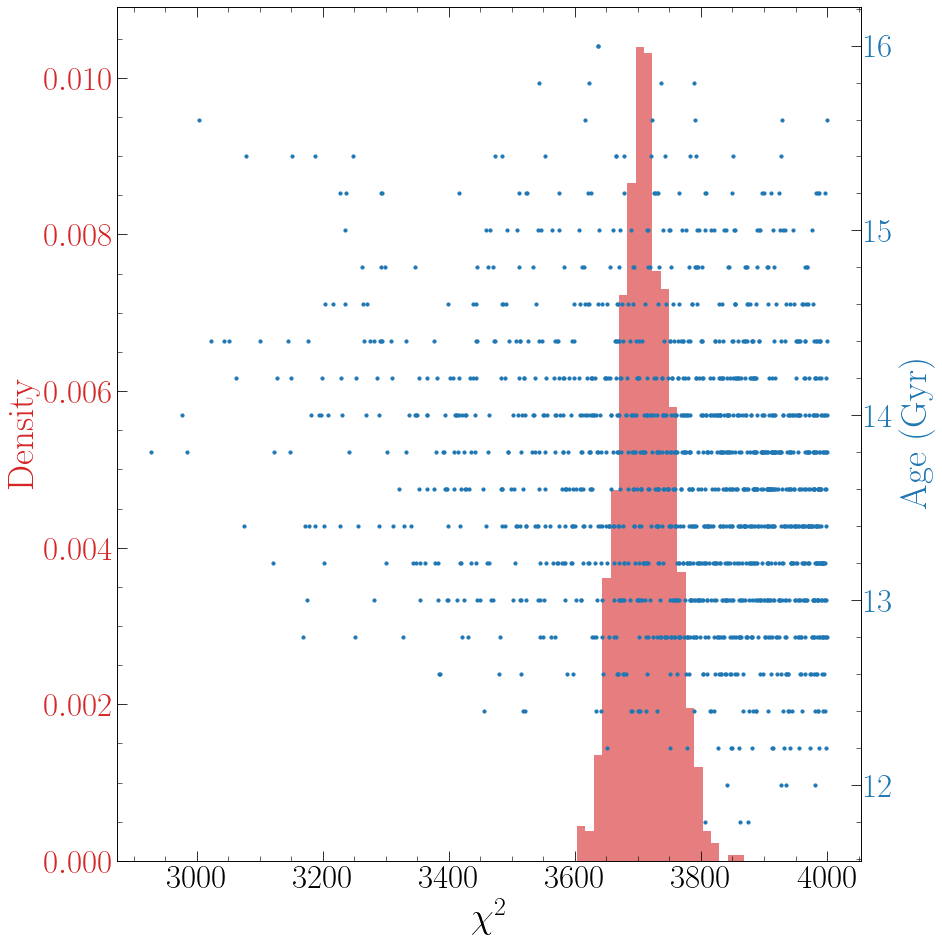

In [7]:
#plot good bins with empirical chi2 distribution
mpl.rcParams['figure.figsize'] = [14, 14]
mpl.rcParams['font.size'] = 37
mpl.rcParams['xtick.labelsize'] = 33
mpl.rcParams['ytick.labelsize'] = 33
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("$\chi^2$")
ax1.set_ylabel('Density', color=color)
ax1.hist(combined,bins=20,alpha=0.6,density=True, color=color)
ax1.tick_params(axis='y',direction="in", labelcolor=color)
ax1.tick_params(axis='x',direction="in")
                
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Age (Gyr)', color=color)  # we already handled the x-label with ax1
ax2.scatter(np.array(chi2_less_4000)[:,3], np.array(chi2_less_4000)[:,0]/1000, color=color, s=10)
ax2.tick_params(axis='y',direction="in", labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [7]:
all_chi2 = []
for file in os.listdir()[:retval]:
    one_iso = []
    dp = pd.read_csv(file)
    for i in range(41):
        idx = dp.index[dp['chi2']==dp.loc[126*i:126*(i+1)].min(axis=0)[-1]]
        chi2 = dp['chi2'].values[idx]
        age = dp['age'].values[idx]
        one_iso.append([chi2[0],age[0]])
    one_iso.sort()
    all_chi2.append(one_iso[0])

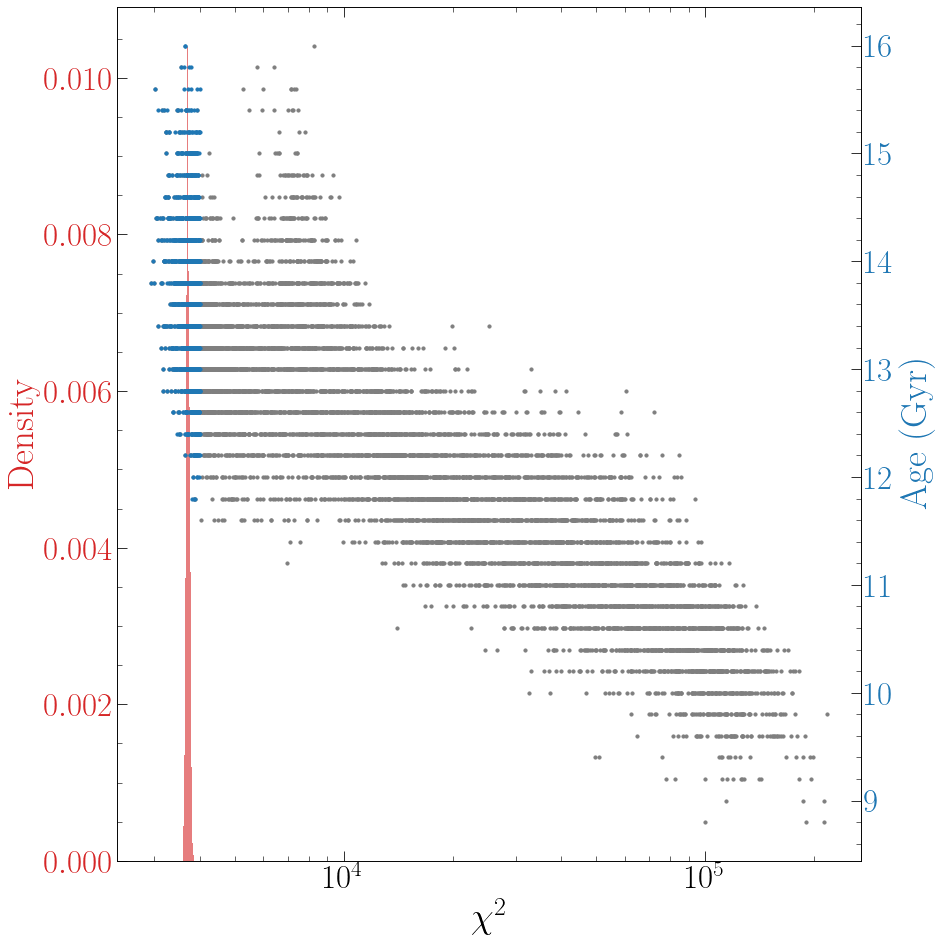

In [23]:
#plot good bins with empirical chi2 distribution
mpl.rcParams['figure.figsize'] = [14, 14]
mpl.rcParams['font.size'] = 37
mpl.rcParams['xtick.labelsize'] = 33
mpl.rcParams['ytick.labelsize'] = 33
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("$\chi^2$")
ax1.set_ylabel('Density', color=color)
ax1.hist(combined,bins=20,alpha=0.6,density=True, color=color)
ax1.tick_params(axis='y',direction="in", labelcolor=color)
ax1.tick_params(axis='x',direction="in")
ax1.set_xscale('log')
                
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:grey'
ax2.scatter(np.array(all_chi2)[:,0],np.array(all_chi2)[:,1]/1000, color=color, s=10)
color = 'tab:blue'
ax2.set_ylabel('Age (Gyr)', color=color)  # we already handled the x-label with ax1
ax2.scatter(np.array(chi2_less_4000)[:,3], np.array(chi2_less_4000)[:,0]/1000, color=color, s=10)
ax2.tick_params(axis='y',direction="in", labelcolor=color)
ax2.set_xscale('log')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [7]:
fig.savefig(M92_path + 'plots\\ages.pdf', dpi=150)

NameError: name 'fig' is not defined

In [8]:
#read calibration star test results
dp = pd.read_csv(M92_path + 'jupyter_modified\\mccdf.csv')
cdf = []
for i in range(len(test_chi2_in_range)):
#    if test_chi2_in_range[i][3] < combined_mean:
#        cdf.append(1)
#    else:
    for j in range(len(dp)):
        if str(dp['MCnumber'].values[j]) == str(int(test_chi2_in_range[i][4])):
            cdf.append(1 - dp['cdf'].values[j])
total_pt = 0
for file in test_chi2_in_range:
    if file[3] >= np.mean(combined_mean):
        total_pt += 1
density = np.linspace(1,total_pt,total_pt)/total_pt

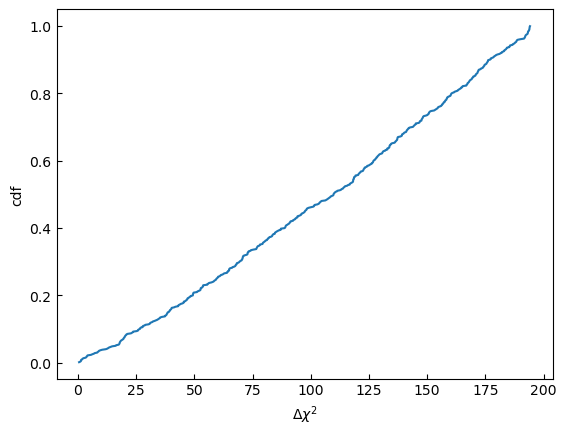

In [9]:
#plot chi2 distribition
chi2 = np.array(test_chi2_in_range)[:,3]
chi2 = np.sort(chi2.astype(float))
chi2 = chi2[chi2 >= np.mean(combined_mean)]
plt.plot(chi2 - np.mean(combined_mean),density)
plt.xlabel("$\Delta \chi^2$")
plt.ylabel('cdf')
plt.tick_params(axis='x',direction="in")
plt.tick_params(axis='y',direction="in")
#plt.savefig(M92_path + 'plots\\delta_chi2.pdf', dpi=150);

In [10]:
#calculate weight for each iso
weight = []
for i in range(len(test_chi2_in_range)):
    if test_chi2_in_range[i][3] <= combined_mean:
        weight.append(cdf[i])
    else:
        for j in range(len(chi2)):
            if chi2[j] == test_chi2_in_range[i][3]:
                weight.append(cdf[i]*(1 - density[j]))

In [22]:
len(weight)

1100

In [23]:
#find age and std
import math
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights,axis=0)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))
average, std = weighted_avg_and_std(test_chi2_in_range[:,0],np.array(weight))

In [24]:
#read all the var files
os.chdir(share_path + 'var')
var = []
for i in range(len(test_chi2_in_range)):
    dp = pd.read_fwf("newvarfeh230.{}".format(str(int(test_chi2_in_range[i,4]))),widths=[10,30],names=['value', 'name'])
    var.append(dp['value'].values)
var = np.array(var)

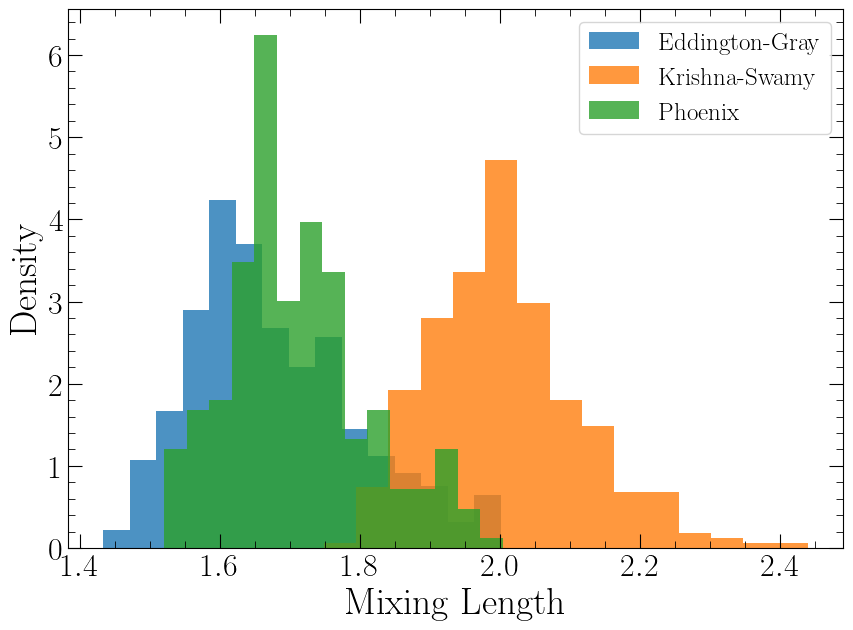

In [40]:
#generate surface boundary condition plot
kttau0 = []
for i in range(len(var)):
    if var[i,6] == 0:
        kttau0.append(var[i,3])
plt.hist(kttau0,bins=15,alpha=0.8,density = True, label='Eddington-Gray')
kttau1 = []
for i in range(len(var)):
    if var[i,6] == 1:
        kttau1.append(var[i,3])
plt.hist(kttau1,bins=15,alpha=0.8,density = True, label='Krishna-Swamy')
kttau5 = []
for i in range(len(var)):
    if var[i,6] == 5:
        kttau5.append(var[i,3])
plt.hist(kttau5,bins=15,alpha=0.8,density = True, label='Phoenix')
plt.legend(fontsize = 18)
plt.xlabel('Mixing Length')
plt.ylabel('Density')
plt.savefig(M92_path + 'plots\\cmix_boundary.pdf', dpi=150,bbox_inches='tight');

In [25]:
#generate mixing length plot
os.chdir(share_path + 'var')
var1 = []
for i in range(10000):
    try:
        dp = pd.read_fwf("newvarfeh230.{}".format(i+10000),widths=[10,30],names=['value', 'name'])
        var1.append(dp['value'].values)
    except:
        pass
var1 = np.array(var1)

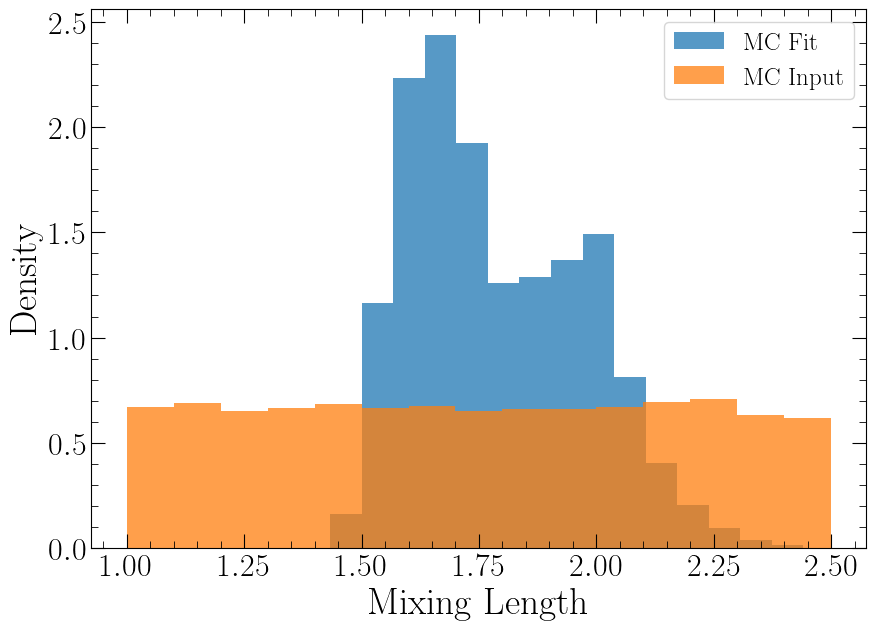

In [38]:
plt.hist(var[:,3],bins=15,alpha=0.75,density = True, label='MC Fit')
plt.hist(var1[:,3],bins=15,alpha=0.75,density = True, label='MC Input')
plt.legend(fontsize = 18)
plt.xlabel('Mixing Length')
plt.ylabel('Density')
plt.savefig(M92_path + 'plots\\cmix_in_and_fit.pdf', dpi=150,bbox_inches='tight');

In [31]:
#error budget
chi2_weight = test_chi2_in_range.tolist()
for i in range(len(chi2_weight)):
    chi2_weight[i].append(weight[i])
chi2_weight = np.array(chi2_weight)

ages = []
names = []
stddevs = []
for k in range(20):
    retval = []
    for i in range(len(test_chi2_in_range)):
        dp = pd.read_fwf("newvarfeh230.{}".format(str(int(test_chi2_in_range[i,4]))),widths=[10,30],names=['value', 'name'])
        retval.append([test_chi2_in_range[i,0],test_chi2_in_range[i,3],dp.iloc[k].values[0], weight[i]])
    retval = np.array(retval)
    retval = retval[retval[:, 2].argsort()]
    age, stddev = weighted_avg_and_std(retval[275:275*3,0],np.array(retval[275:275*3,-1]))
    ages.append(age)
    stddevs.append(stddev)
    names.append(dp.iloc[k].values[1])
dm = chi2_weight[chi2_weight[:, 1].argsort()]
age, stddev = weighted_avg_and_std(dm[275:275*3,0],dm[275:275*3,-1])
ages.append(age)
stddevs.append(stddev)
names.append('Distance Modulus')
red = chi2_weight[chi2_weight[:, 2].argsort()]
age, stddev = weighted_avg_and_std(red[275:275*3,0],red[275:275*3,-1])
ages.append(age)
stddevs.append(stddev)
names.append('Reddening')
names = ['[Fe/H]','Primordial He', r"[$\alpha$/Fe]",'Mixing length','He diffusion', 'Heavy element diffusion','Surface boundary condition', 'Convective envelope overshoot', r'$p + p \to H_2 + e + \nu$', r'${ }^{3}He + { }^{3}He \to { }^{4}He + p + p$', r'${ }^{3}He + { }^{4}He \to { }^{2}H + \gamma$', r'${ }^{12}C + p \to { }^{13}N + \gamma$ ', r'${ }^{13}C + p \to { }^{14}N + \gamma$', r'${ }^{14}N + p \to { }^{15}O + \gamma$', r'${ }^{16}N + p \to { }^{17}F + \gamma$','Low T opacities', "High T opacities",r'Triple-$alpha$ coeff', 'Plasma neutrino loses', 'Conductive opacities','Distance Modulus','Reddening']

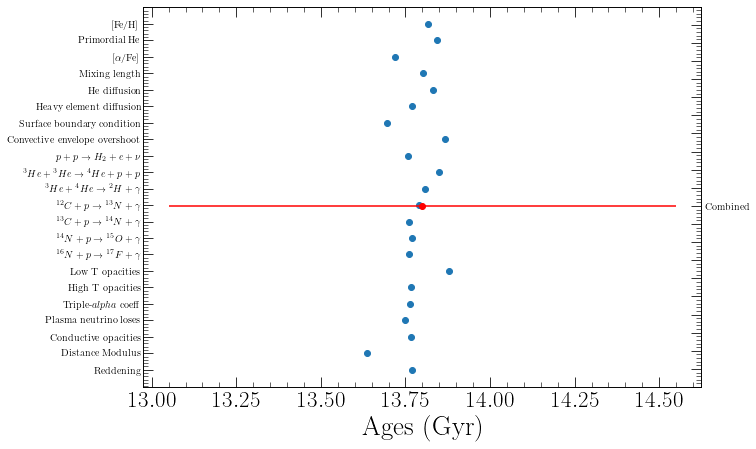

In [17]:
x = np.array(ages)[::-1]/1000
y = np.arange(22)
names.reverse()
y_ticks_labels = names

fig, ax = plt.subplots(1,1) 
ax.scatter(x,y)

# Set number of ticks for x-axis
ax.set_yticks(y)
# Set ticks labels for x-axis
ax.set_yticklabels(y_ticks_labels, rotation='horizontal',fontsize=10)
ax2 = ax.twinx()
ax2.errorbar(average/1000,10,xerr=std/1000,barsabove=True,ecolor='red')
ax2.scatter(average/1000,10,c='red')
y_ticks_labels = ['','','','','','','','','','','Combined','','','','','','','','','','','']
# Set number of ticks for x-axis
ax2.set_yticks(y)
# Set ticks labels for x-axis
ax2.set_yticklabels(y_ticks_labels, rotation='horizontal',fontsize=10)
ax.set_xlabel('Ages (Gyr)');
#plt.savefig(M92_path + 'plots\\error_budget_1.pdf', dpi=300);

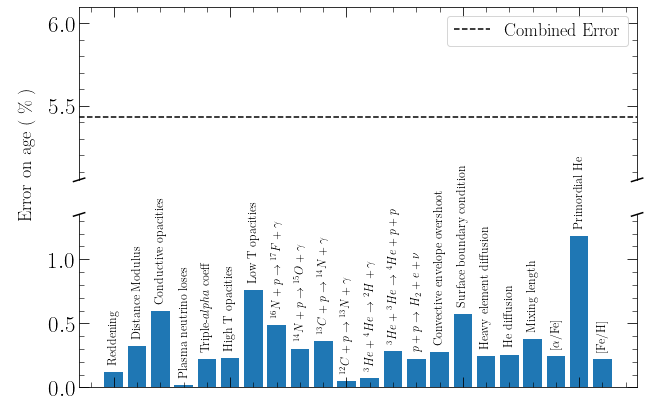

In [18]:
y = np.abs(np.array(ages) - average)/average*100
x = np.arange(22)
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax2.bar(x, height=y)
ax.axhline(y=std/average*100,linestyle='--',c='black', label='Combined Error')
ax.legend(prop={'size': 18})

# zoom-in / limit the view to different portions of the data
ax2.set_ylim(0.0, 1.35)  # outliers only
ax.set_ylim(5.05, 6.1)  # most of the data
#ax2.axes.xaxis.set_visible(False)
ax2.axes.xaxis.set_ticklabels([])
#ax2.set_xticks(x)
#ax2.set_xticklabels(names,rotation='vertical',fontsize=10)
rects = ax2.patches
labels = names
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height+0.05, label,
            ha='center', va='bottom',rotation='vertical',fontsize=12)
# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
ax2.set_ylabel(r'Error on age ( $\%$ )',fontsize=18)
ax2.yaxis.set_label_coords(0.05, 0.5, transform=fig.transFigure);
#plt.savefig(M92_path + 'plots\\error_budget_2.pdf', dpi=300);

In [32]:
import seaborn as sns
retval = []
for i in range(len(test_chi2_in_range)):
    retval.append([test_chi2_in_range[i,0],test_chi2_in_range[i,1],test_chi2_in_range[i,2],test_chi2_in_range[i,3]])
retval = np.array(retval)
data = retval
data[:,[0,1,2]] = data[:,[1,2,0]]
for i in range(len(data)):
    data[i,3] = weight[i]
grouped_list = []
for i in range(len(data)):
    found = False
    for j in range(len(grouped_list)):
        if data[i][0] == grouped_list[j][0] and data[i][1] == grouped_list[j][1]:
            grouped_list[j].append(data[i][2:])
            found = True
    if found == False:
        append_val = data[i][:2].tolist()
        append_val.append(data[i][2:])
        grouped_list.append(append_val)
grouped_age = []
for i in range(len(grouped_list)):
    append_val = grouped_list[i][:2]
    average, std = weighted_avg_and_std(np.array(grouped_list[i][2:])[:,0],np.array(grouped_list[i][2:])[:,1])
    append_val.append(average/1000)
    grouped_age.append(append_val)
df = pd.DataFrame(grouped_age,columns=['Distance Modulus','Reddening','Estimated Age'])
df = df.pivot('Distance Modulus','Reddening','Estimated Age')

C:\Users\marti\AppData\Local\Temp\ipykernel_14948\1811432187.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.pivot('Distance Modulus','Reddening','Estimated Age')


In [33]:
DM = np.linspace(14.62,14.82,21)
red = df.columns.values
counts = np.zeros((len(DM),len(red)))
for i in range(len(counts)):
    for j in range(len(counts[i])):
        if np.isnan(df[red[j]].values[i]) == True:
            counts[i][j] = 0
        else:
            for k in range(len(data)):
                if np.abs(data[k][0] - DM[i]) < 1e-5  and np.abs(data[k][1] - red[j]) < 1e-5:
                    counts[i][j] += 1
counts = counts/sum(sum(counts))

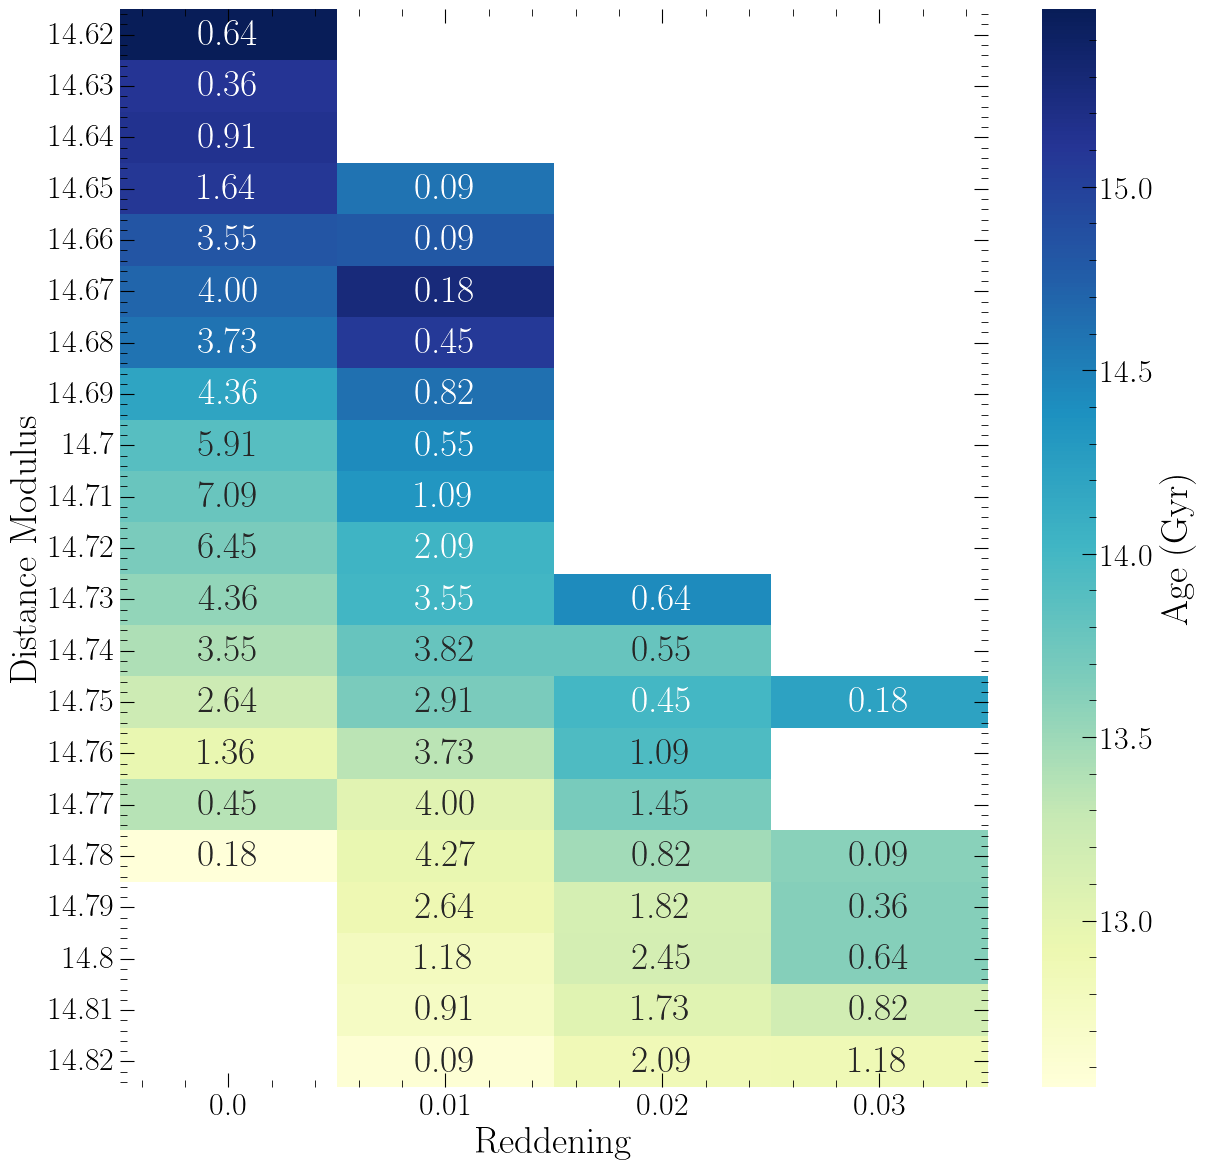

In [18]:
#plot heatmap for dm vs r
mpl.rcParams['figure.figsize'] = [14, 14]
ax = sns.heatmap(df,cmap="YlGnBu",annot=counts,fmt='.2%',cbar_kws={"label": "Age (Gyr)"})
#ax.axhline(y=20.9856,c='black',linewidth=1)
#ax.axvline(x=3.994,c='black',linewidth=1)
plt.savefig(M92_path + 'plots\\dm_vs_red.pdf', dpi=300);

In [34]:
grouped_counts = np.array(grouped_age)
ages = np.zeros((len(DM),len(red)))
for i in range(len(DM)):
    for j in range(len(red)):
        for k in range(len(grouped_counts)):
            if np.abs(grouped_counts[k][0] - DM[i]) < 1e-5 and np.abs(grouped_counts[k][1] - red[j]) < 1e-5:
                ages[i,j] = grouped_age[k][2]
                grouped_counts[k][2] = counts[i,j]*100
df = pd.DataFrame(grouped_counts,columns=['Distance Modulus','Reddening','counts'])
df = df.pivot('Distance Modulus','Reddening','counts')

C:\Users\marti\AppData\Local\Temp\ipykernel_14948\1078836290.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.pivot('Distance Modulus','Reddening','counts')


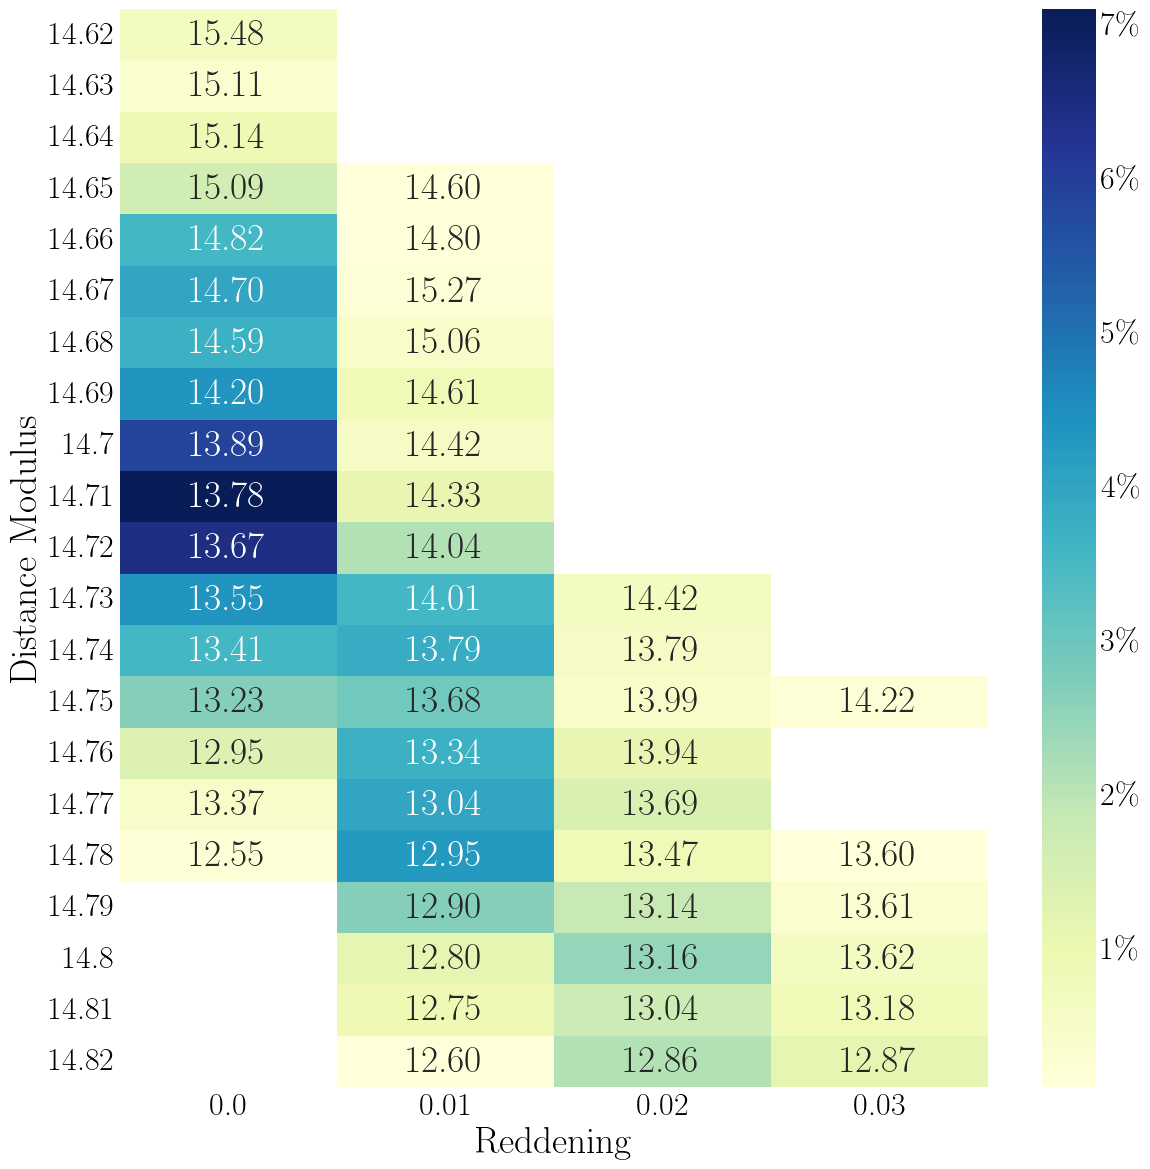

In [35]:
#plot heatmap for dm vs r
mpl.rcParams['xtick.minor.visible'] = False
mpl.rcParams['ytick.minor.visible'] = False
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['figure.figsize'] = [14, 14]
ax = sns.heatmap(df,cmap="YlGnBu",annot=ages,fmt='.2f')
cbar = ax.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4,5,6,7])
cbar.set_ticklabels(['1\%', '2\%', '3\%', '4\%', '5\%', '6\%', '7\%']);
#ax.axhline(y=20.9856,c='black',linewidth=1)
#ax.axvline(x=3.994,c='black',linewidth=1)
plt.savefig(M92_path + 'plots\\dm_vs_red_2.pdf', dpi=300, bbox_inches='tight' );

In [20]:
DM_avg, DM_std = weighted_avg_and_std(data[:,0],data[:,-1])
red_avg, red_std = weighted_avg_and_std(data[:,1],data[:,-1])

In [21]:
print("Distance Modulus = {} with std = {}".format(DM_avg, DM_std))
print("Reddeing = {} with std = {}".format(red_avg, red_std))

Distance Modulus = 14.72441167350863 with std = 0.04313714307238721
Reddeing = 0.004338740732727126 with std = 0.006162141439100471


In [22]:
var

array([[-2.372615,  0.238054,  0.4     , ...,  1.006929,  1.199123,
         1.      ],
       [-2.305153,  0.24754 ,  0.4     , ...,  1.003038,  0.922338,
         1.      ],
       [-2.327691,  0.247851,  0.4     , ...,  0.97108 ,  0.909135,
         1.      ],
       ...,
       [-2.332032,  0.245775,  0.2     , ...,  1.096677,  1.045841,
         1.      ],
       [-2.319669,  0.253003,  0.2     , ...,  0.982944,  1.249244,
         1.      ],
       [-2.319669,  0.253003,  0.2     , ...,  0.982944,  1.249244,
         1.      ]])

In [23]:
#Read all var files
total_var = var.T[:-1].tolist()
total_var.append(data[:,0].tolist())
total_var.append(data[:,1].tolist())
total_var = np.array(total_var)

In [24]:
#generate covariance matrix
m_cov = np.cov(total_var, aweights=data[:,-1])

In [25]:
import statsmodels.api as sm

In [26]:
mod_wls = sm.WLS(data[:,2], np.vstack([total_var, np.ones(1100)]).T, weights=data[:,-1])
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            WLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     1993.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        14:27:29   Log-Likelihood:                   -inf
No. Observations:                1100   AIC:                               inf
Df Residuals:                    1077   BIC:                               inf
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3276.6329     50.543    -64.829      0.0

C:\Users\marti\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


In [27]:
#find total variance
retval = 0
for i in range(len(res_wls.params) - 1):
    for j in range(len(res_wls.params) - 1):
        if i == j:
            retval += np.std(total_var.T[:,i])**2 *res_wls.params[i]**2
        else:
            retval += res_wls.params[i]*res_wls.params[j]*m_cov[i][j]
np.sqrt(retval)

769.4486475540367

In [28]:
#total variance without correlation
retval = 0
for i in range(len(res_wls.params) - 1):
    for j in range(len(res_wls.params) - 1):
        if i == j:
            retval += np.std(total_var.T[:,i])**2 *res_wls.params[i]**2
        else:
            retval += 0
np.sqrt(retval)

758.0548100199208

In [29]:
#create lists of names and error greater than 5%
y = []
for i in range(22):
    y.append(np.abs(np.std(total_var.T[:,i]) *res_wls.params[i]/average *100))
y = np.array(y)
names = ['[Fe/H]','Primordial He', r"[$\alpha$/Fe]",'Mixing length','He diffusion', 'Heavy element diffusion','Surface boundary condition', 'Convective envelope overshoot', r'$p + p \to H_2 + e + \nu$', r'${ }^{3}He + { }^{3}He \to { }^{4}He + p + p$', r'${ }^{3}He + { }^{4}He \to { }^{2}H + \gamma$', r'${ }^{12}C + p \to { }^{13}N + \gamma$ ', r'${ }^{13}C + p \to { }^{14}N + \gamma$', r'${ }^{14}N + p \to { }^{15}O + \gamma$', r'${ }^{16}N + p \to { }^{17}F + \gamma$','Low T opacities', "High T opacities",r'Triple-$alpha$ coeff', 'Plasma neutrino loses', 'Conductive opacities','Distance','Reddening']
others = 0
mask = []
for i in range(len(names)):
    if y[i] > 0.05:
#        print(names[i])
#        print(y[i])
        mask.append(i)
    else:
        others += y[i]**2
names_update = []
for i in mask:
    names_update.append(names[i])
names_update.append('Others')
y = y[mask].tolist()
y.append(np.sqrt(others))
y = np.array(y)

In [112]:
std/average

0.05432030503662394

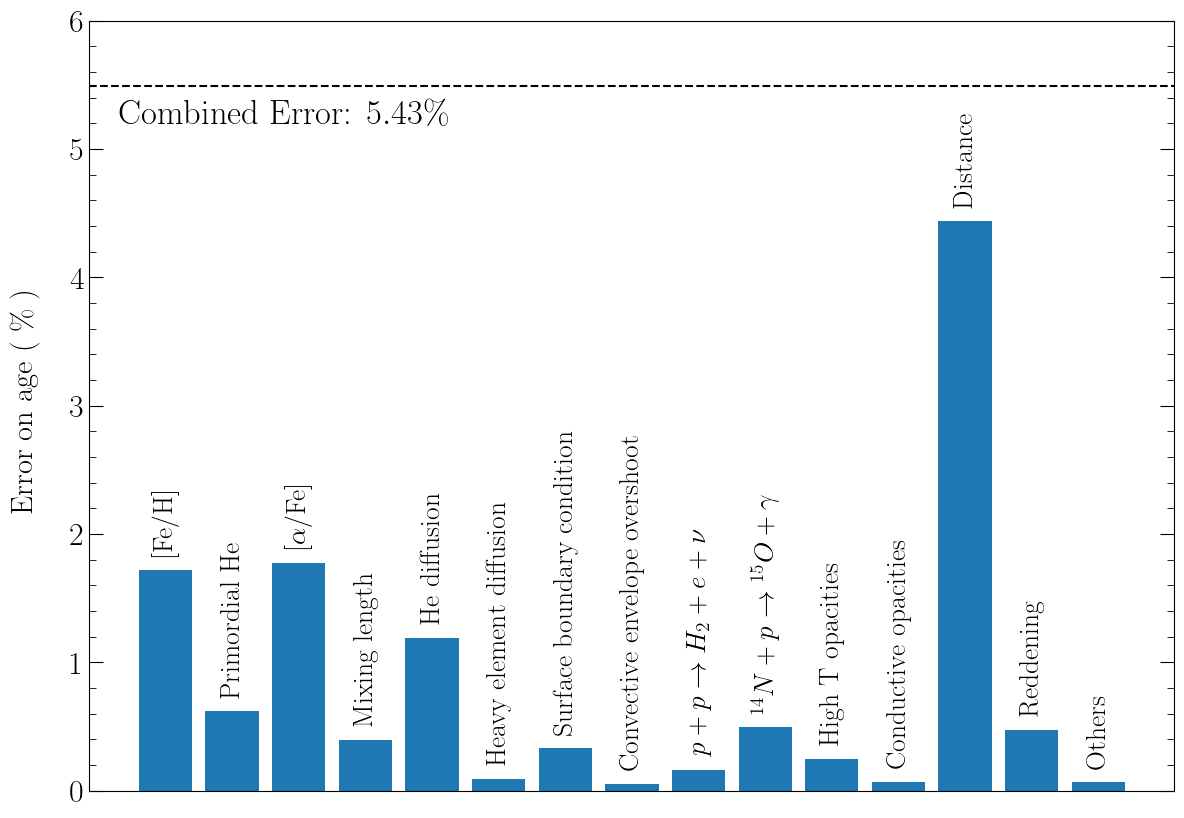

In [116]:
#Plot
from matplotlib.offsetbox import AnchoredText
mpl.rcParams['figure.figsize'] = [14, 10]
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.minor.size'] = 0
#y = np.abs(np.array(ages) - average)/average*100
x = np.arange(15)
fig, ax2 = plt.subplots(1,1)
# plot the same data on both axes
ax2.bar(x, height=y)
ax2.axhline(y=np.sqrt(retval)/average*100,linestyle='--',c='black')
#ax2.legend(prop={'size': 18})
ax2.set_ylim(0.0, 6)  # outliers only
#ax2.axes.xaxis.set_visible(False)
#ax2.text(0.95, 0.95, r"$\textup{Combined Error:} 5.3\%$", transform=ax.transAxes, fontsize=14,verticalalignment='top')
txt = ax2.text(1.8, 5.2, r"$\textup{Combined Error: } 5.43\%$", size=25, ha="center", color="black")

#anchored_text = AnchoredText("Test", loc=2)
#ax2.add_artist(anchored_text)
ax2.axes.xaxis.set_ticklabels([])
#ax2.set_xticks(x)
#ax2.set_xticklabels(names,rotation='vertical',fontsize=10)
rects = ax2.patches
labels = names_update
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height+0.10, label,
            ha='center', va='bottom',rotation='vertical',fontsize=20)
# hide the spines between ax and ax2
ax2.xaxis.tick_top()
ax2.xaxis.tick_bottom()
ax2.set_ylabel(r'Error on age ( $\%$ )',fontsize=22)
ax2.yaxis.set_label_coords(0.09, 0.5, transform=fig.transFigure)
plt.savefig(M92_path + 'plots\\error_budget_4.png', dpi=300)
plt.show();

In [37]:
#try to do analysis with fixed distance modulus and reddening
DM = 14.71
Red = 0.0 
idx = []
for i in range(len(total_var[0])):
    if total_var[-1][i] == Red and total_var[-2][i] == DM:
        idx.append(i)
partial_var = total_var[:,idx][:-2]
var_len = len(idx)
mod_wls = sm.WLS(data[idx,2], np.vstack([partial_var, np.ones(var_len)]).T, weights=data[idx,-1])
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            WLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     79.72
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           2.27e-34
Time:                        13:19:31   Log-Likelihood:                -463.20
No. Observations:                  78   AIC:                             968.4
Df Residuals:                      57   BIC:                             1018.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3249.9309    147.578    -22.022      0.0

In [38]:
#create lists of names and error greater than 5%
y = []
for i in range(20):
    y.append(np.abs(np.std(partial_var.T[:,i]) *res_wls.params[i]/average *100))
y = np.array(y)
names = ['[Fe/H]','Primordial He', r"[$\alpha$/Fe]",'Mixing length','He diffusion', 'Heavy element diffusion','Surface boundary condition', 'Convective envelope overshoot', r'$p + p \to H_2 + e + \nu$', r'${ }^{3}He + { }^{3}He \to { }^{4}He + p + p$', r'${ }^{3}He + { }^{4}He \to { }^{2}H + \gamma$', r'${ }^{12}C + p \to { }^{13}N + \gamma$ ', r'${ }^{13}C + p \to { }^{14}N + \gamma$', r'${ }^{14}N + p \to { }^{15}O + \gamma$', r'${ }^{16}N + p \to { }^{17}F + \gamma$','Low T opacities', "High T opacities",r'Triple-$alpha$ coeff', 'Plasma neutrino loses', 'Conductive opacities']
others = 0
mask = []
for i in range(len(names)):
    if y[i] > 0.25:
#        print(names[i])
#        print(y[i])
        mask.append(i)
    else:
        others += y[i]**2
names_update = []
for i in mask:
    names_update.append(names[i])
names_update.append('Others')
y = y[mask].tolist()
y.append(np.sqrt(others))
y = np.array(y)

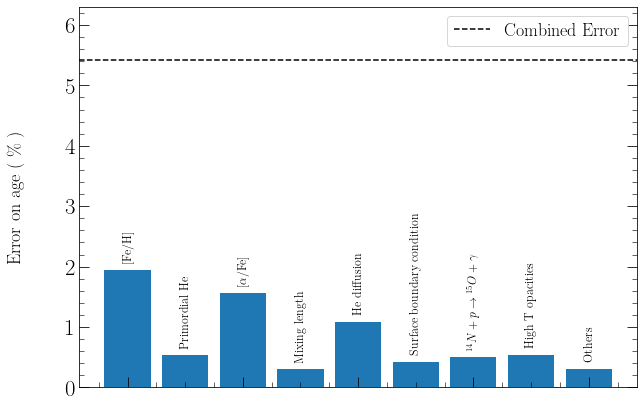

In [39]:
#Plot
#y = np.abs(np.array(ages) - average)/average*100
x = np.arange(len(y))
fig, ax2 = plt.subplots(1,1)
# plot the same data on both axes
ax2.bar(x, height=y)
ax2.axhline(y=np.sqrt(retval)/average*100,linestyle='--',c='black', label='Combined Error')
ax2.legend(prop={'size': 18})
ax2.set_ylim(0.0, 6.3)  # outliers only
#ax2.axes.xaxis.set_visible(False)
ax2.axes.xaxis.set_ticklabels([])
#ax2.set_xticks(x)
#ax2.set_xticklabels(names,rotation='vertical',fontsize=10)
rects = ax2.patches
labels = names_update
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height+0.10, label,
            ha='center', va='bottom',rotation='vertical',fontsize=12)
# hide the spines between ax and ax2
ax2.xaxis.tick_top()
ax2.xaxis.tick_bottom()
ax2.set_ylabel(r'Error on age ( $\%$ )',fontsize=18)
ax2.yaxis.set_label_coords(0.05, 0.5, transform=fig.transFigure)

C:\Users\marti\AppData\Local\Temp/ipykernel_10500/2691105003.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


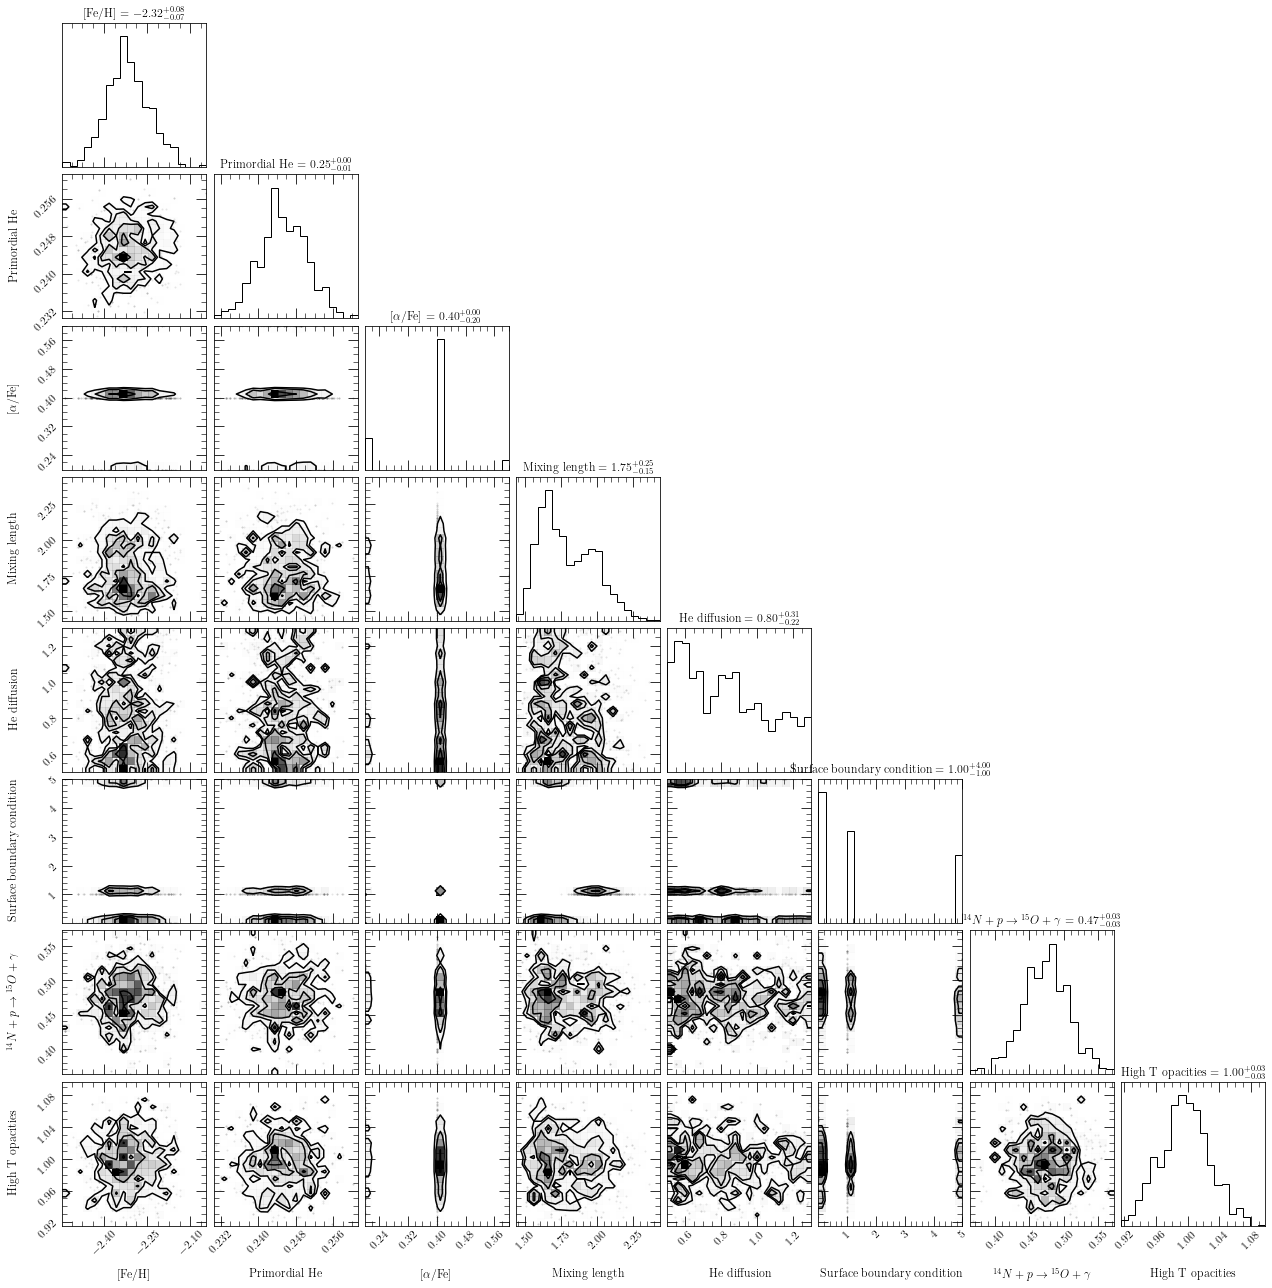

In [40]:
import corner
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
fig = corner.corner(total_var[mask,:].T,weight=np.array(weight),labels=np.array(names)[mask],
    show_titles=True,
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 12});
fig.show()

In [42]:
fig.savefig(M92_path + 'plots\\corner.pdf', dpi=300);

In [96]:
total_var[mask[0],:]

array([-2.372615, -2.305153, -2.327691, ..., -2.332032, -2.319669,
       -2.319669])

In [105]:
import scipy.stats
for i in range(len(mask)):
    for j in range(len(mask)):
        if i > j:
            corr, _ = scipy.stats.pearsonr(total_var[mask[i],:], total_var[mask[j],:])
            print("Pearson correlation coefficient of {} and {} is {}".format(names[mask[i]],names[mask[j]],corr))

Pearson correlation coefficient of Primordial He and [Fe/H] is 0.12701008427285748
Pearson correlation coefficient of [$\alpha$/Fe] and [Fe/H] is -0.09038799537444997
Pearson correlation coefficient of [$\alpha$/Fe] and Primordial He is -0.018092130236410903
Pearson correlation coefficient of Mixing length and [Fe/H] is -0.016669441996158944
Pearson correlation coefficient of Mixing length and Primordial He is -0.06604297967359327
Pearson correlation coefficient of Mixing length and [$\alpha$/Fe] is -0.07057205920239287
Pearson correlation coefficient of He diffusion and [Fe/H] is -0.013153310105863156
Pearson correlation coefficient of He diffusion and Primordial He is 0.033548101430913926
Pearson correlation coefficient of He diffusion and [$\alpha$/Fe] is -0.0024751866173593033
Pearson correlation coefficient of He diffusion and Mixing length is -0.08916673378749487
Pearson correlation coefficient of Surface boundary condition and [Fe/H] is -0.1490355567588827
Pearson correlation co

In [101]:
corr

0.12701008427285748

In [ ]:
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
fig = corner.corner(partial_var[mask,:].T,weight=np.array(weight),labels=names,
    show_titles=True,
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 12});
fig.show()

C:\Users\irisd\AppData\Local\Temp/ipykernel_2464/570737068.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


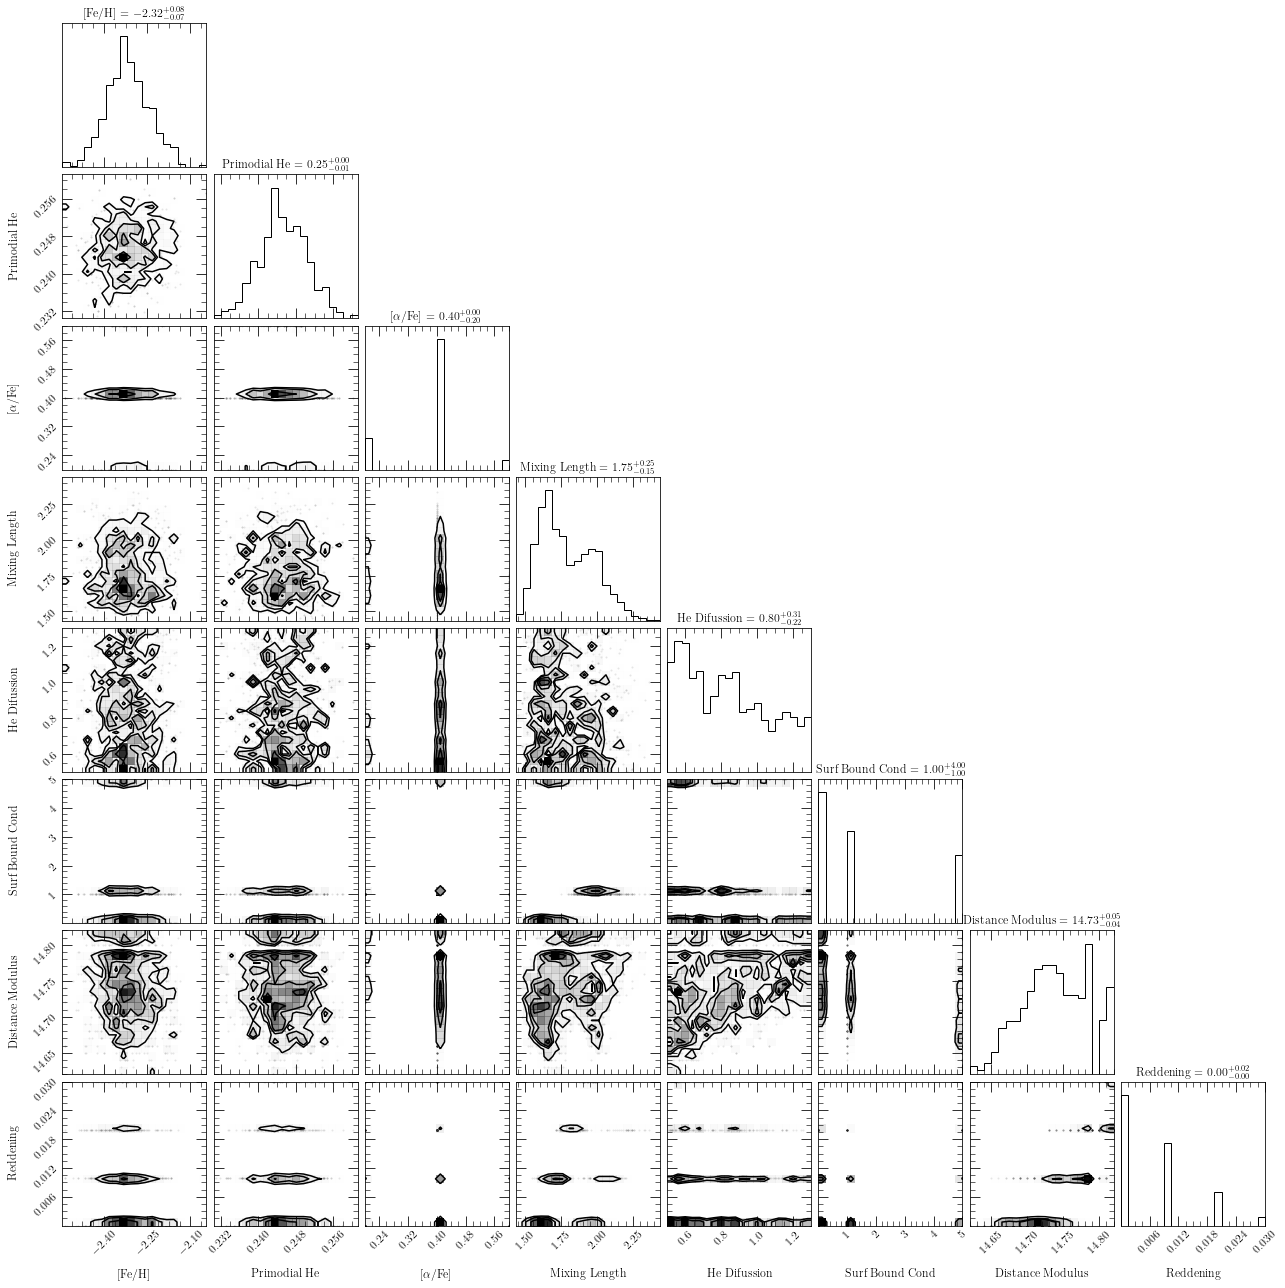

In [266]:
import corner
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
fig = corner.corner(total_var[[0,1,2,3,4,6,-2,-1],:].T,weight=weight,labels=[#"$\[ Fe/H \]$",
                                                                    #"$\[ \alpha /Fe \]$",
    r"[Fe/H]","Primodial He",r"[$\alpha$/Fe]","Mixing Length",
    "He Difussion","Surf Bound Cond","Distance Modulus","Reddening"],
    show_titles=True,
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 12});
fig.show()

C:\Users\irisd\AppData\Local\Temp/ipykernel_2464/2258072847.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


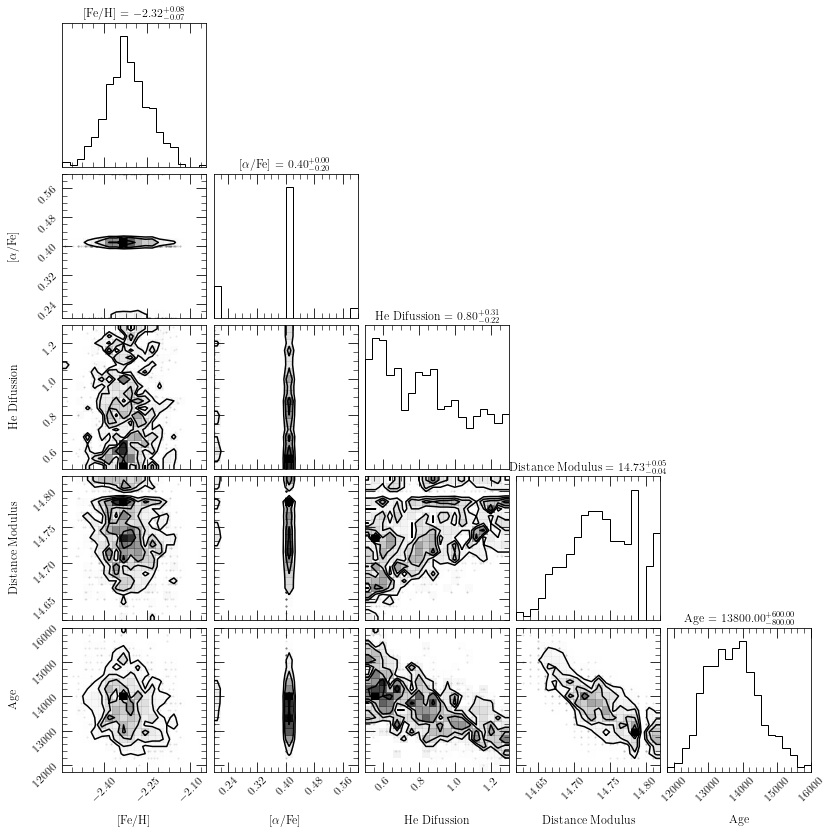

In [272]:
import corner
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
fig = corner.corner(np.vstack((total_var[[0,2,4,-2],:],test_chi2_in_range[:,0])).T,weight=weight,labels=[#"$\[ Fe/H \]$",
                                                                    #"$\[ \alpha /Fe \]$",
    r"[Fe/H]",r"[$\alpha$/Fe]",
                                                                    "He Difussion",
                                                                    "Distance Modulus", "Age"],
    show_titles=True,
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 12});
fig.show()
#plt.savefig(M92_path + 'plots\\Mixing_length_corner.png', dpi=300);

C:\Users\irisd\AppData\Local\Temp/ipykernel_2464/688204565.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


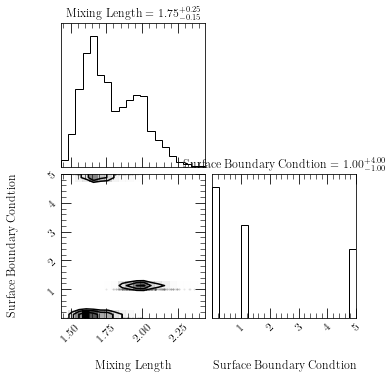

In [260]:
import corner
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
fig = corner.corner(total_var[[3,6],:].T,weight=weight,labels=[#"$\[ Fe/H \]$",
                                                                    #"$\[ \alpha /Fe \]$",
    'Mixing Length', 'Surface Boundary Condtion'],
    show_titles=True,
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 12});
fig.show()

In [88]:
import seaborn as sns
mpl.rcParams['figure.figsize'] = [14, 14]
covset = np.zeros((len(names),len(names)))
for i in range(len(names)):
    for j in range(len(names)):
        if i != j:
            covset[i,j] = np.sqrt(np.abs(res_wls.params[i]*res_wls.params[j]*m_cov[i][j]))/retval*100

In [89]:
covset

array([[0.00000000e+00, 9.06144235e-03, 1.42164155e-02, 1.99520652e-03,
        5.72242889e-03, 1.46090996e-03, 8.15783761e-03, 1.01815695e-03,
        2.63608698e-03, 9.19433697e-04, 5.60349035e-04, 8.69035125e-04,
        5.87072655e-04, 4.51588154e-03, 4.73370097e-04, 3.60752487e-04,
        2.66310772e-03, 1.15366436e-04, 1.97644358e-03, 1.30840333e-03,
        2.13318135e-02, 7.14593143e-03],
       [9.06144235e-03, 0.00000000e+00, 3.87991827e-03, 3.56972017e-03,
        6.47187683e-03, 1.34209310e-03, 2.06840849e-03, 1.04339509e-03,
        1.91528111e-03, 8.53064749e-04, 3.01258752e-04, 8.82740954e-04,
        5.87109260e-04, 2.04223280e-03, 6.13556389e-04, 7.91778618e-05,
        1.24423735e-03, 4.35749583e-04, 9.84897839e-04, 1.01782750e-03,
        1.12608139e-02, 1.69386360e-03],
       [1.42164155e-02, 3.87991827e-03, 0.00000000e+00, 5.02599616e-03,
        7.33206896e-04, 1.44290610e-03, 6.99742288e-03, 1.18783204e-03,
        2.19349224e-03, 8.55930484e-04, 6.22496019e-04

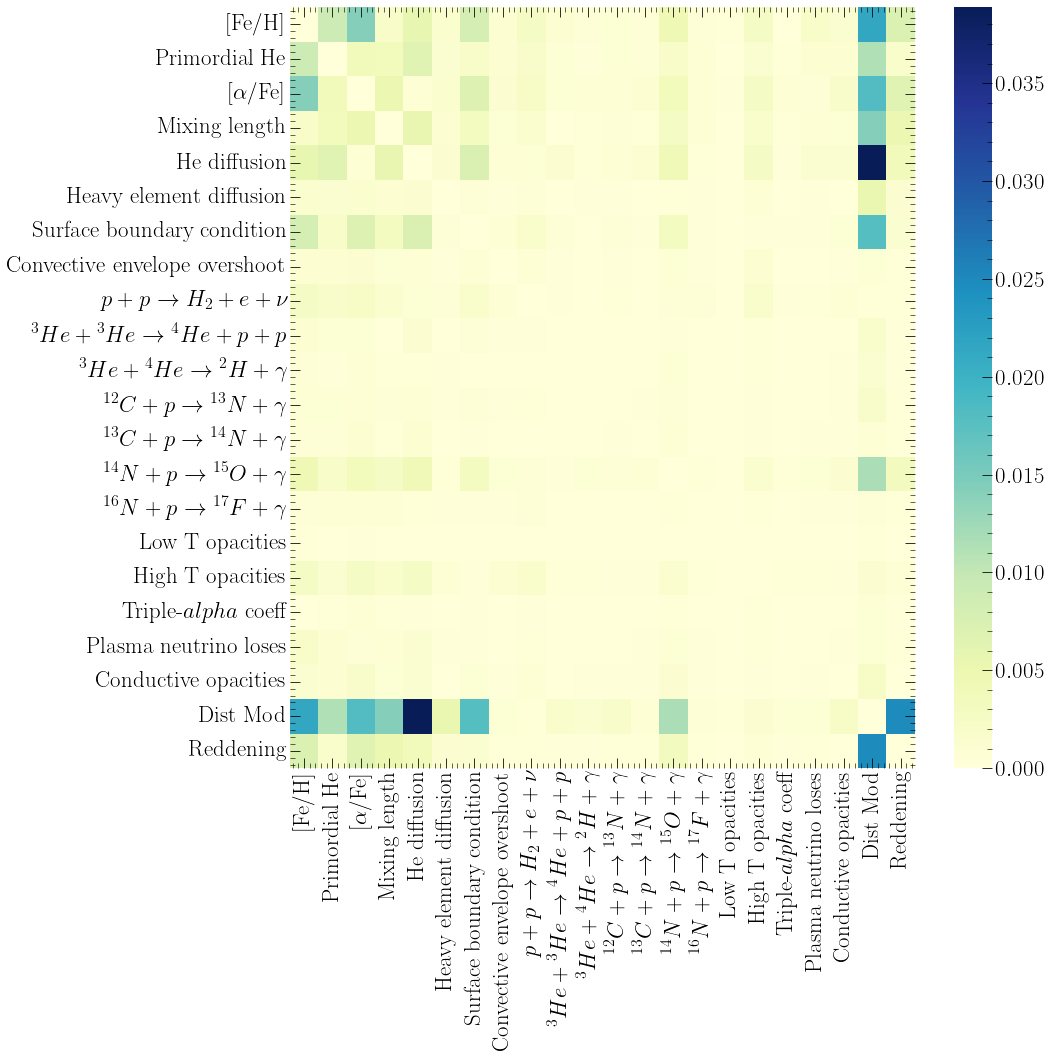

In [92]:
ax = sns.heatmap(covset,cmap="YlGnBu",xticklabels=names,yticklabels=names)

In [121]:
ret_data = []
sample_idx = np.random.randint(0,high=1100,size=1000000)
for i in range(1000000):
    if np.random.random() < weight[sample_idx[i]]:
        ret_data.append(test_chi2_in_range[sample_idx[i],0])
np.percentile(ret_data,[2.5,5,95,97.5])

array([12400., 15400.])

In [132]:
np.percentile(ret_data,[5,95])

array([12600., 15200.])

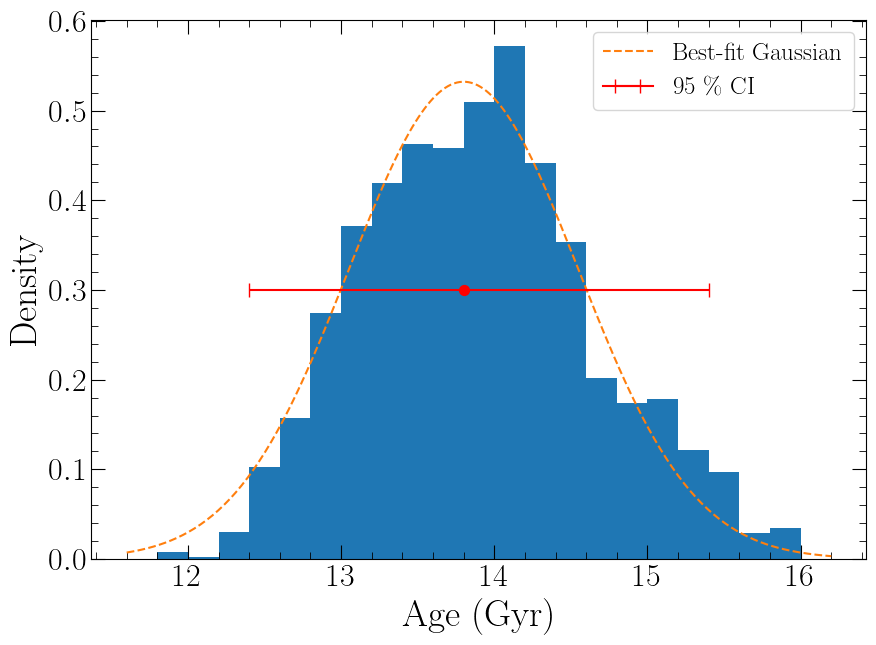

In [146]:
from scipy.stats import norm
mpl.rcParams['figure.figsize'] = [10, 7]
average, std = weighted_avg_and_std(test_chi2_in_range[:,0],np.array(weight))
bins = np.linspace(11.7999,15.7999,21).tolist()
bins.append(16.0001)
bins = np.array(bins)
plt.hist(test_chi2_in_range[:,0]/1000,weights=weight,density=True,bins = bins)
x_axis = np.linspace(11.6,16.2,240)
plt.plot(x_axis, norm.pdf(x_axis, average/1000, std/1000),'--',label='Best-fit Gaussian')
plt.errorbar(average/1000, 0.3, xerr=np.array([[average/1000 - 12400/1000], [15400/1000 - average/1000]]),capsize=5,label=r"95 \% CI",c='r')
plt.scatter(average/1000, 0.3,s=50,c='r')
plt.xlabel('Age (Gyr)')
plt.ylabel('Density')
plt.legend(fontsize=18)
plt.savefig(M92_path + 'plots\\Age_distribution.pdf', dpi=300);

C:\Users\marti\AppData\Local\Temp\ipykernel_15296\2880011800.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=total_var[0,:], y=test_chi2_in_range[:,0]/1000, cmap="Blues", shade=True, bw_adjust=.5, ax=axis[0,0])
C:\Users\marti\AppData\Local\Temp\ipykernel_15296\2880011800.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=total_var[2,:], y=test_chi2_in_range[:,0]/1000, cmap="Blues", shade=True, bw_adjust=.5, ax=axis[0,1])
C:\Users\marti\AppData\Local\Temp\ipykernel_15296\2880011800.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=total_var[4,:], y=test_chi2_in_range[:,0]/1000, cmap="Blues", shade=True, bw_ad

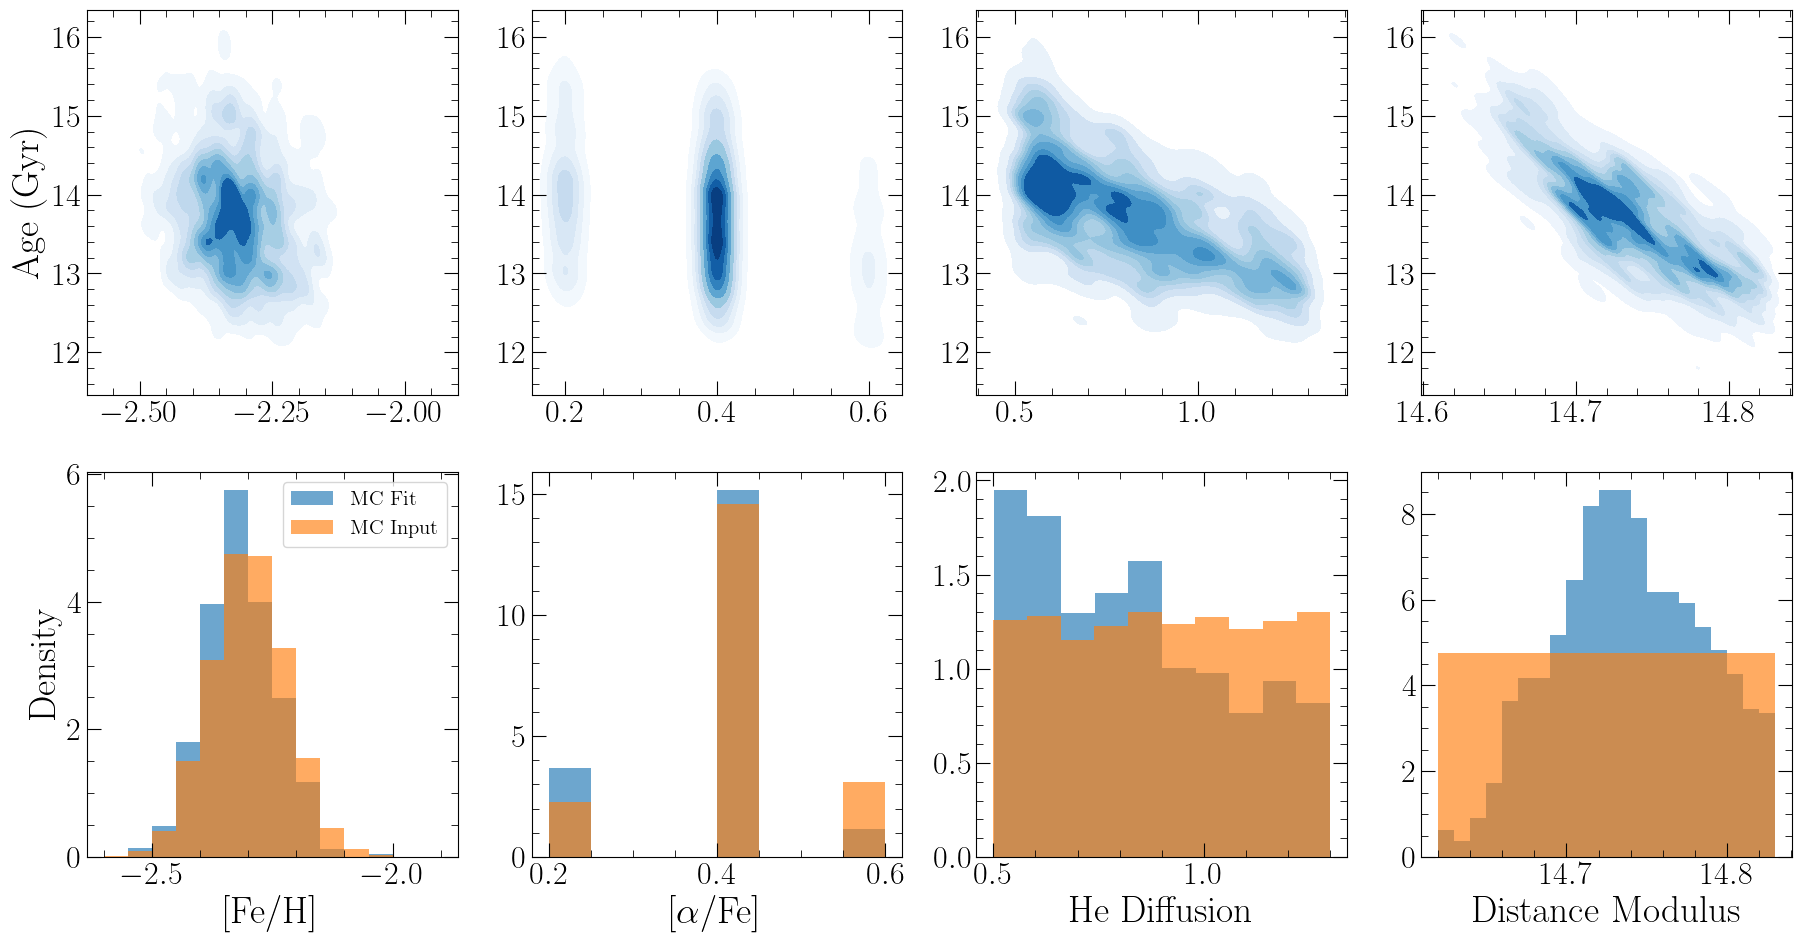

In [152]:
mpl.rcParams['figure.figsize'] = [22, 11]
figure, axis = plt.subplots(2, 4)
sns.kdeplot(x=total_var[0,:], y=test_chi2_in_range[:,0]/1000, cmap="Blues", shade=True, bw_adjust=.5, ax=axis[0,0])
axis[0,0].set_xlim(-2.6,-1.9)
sns.kdeplot(x=total_var[2,:], y=test_chi2_in_range[:,0]/1000, cmap="Blues", shade=True, bw_adjust=.5, ax=axis[0,1])
sns.kdeplot(x=total_var[4,:], y=test_chi2_in_range[:,0]/1000, cmap="Blues", shade=True, bw_adjust=.5, ax=axis[0,2])
sns.kdeplot(x=total_var[-2,:], y=test_chi2_in_range[:,0]/1000, cmap="Blues", shade=True, bw_adjust=.5, ax=axis[0,3])
axis[1,0].hist(total_var[0,:],density=True,alpha=0.65, label='MC Fit', bins=np.linspace(-2.6,-1.9,15))
axis[1,1].hist(total_var[2,:],density=True,alpha=0.65, label='MC Fit', bins=np.linspace(0.2,0.6,9))
axis[1,2].hist(total_var[4,:],density=True,alpha=0.65, label='MC Fit')
axis[1,3].hist(total_var[-2,:],density=True,alpha=0.65, label='MC Fit',bins=np.linspace(14.62,14.83,22))
axis[1,0].hist(var1[:,0],density=True,alpha=0.65, label='MC Input', bins=np.linspace(-2.6,-1.9,15))
axis[1,1].hist(var1[:,2],density=True,alpha=0.65, bins=np.linspace(0.2,0.6,9))
axis[1,2].hist(var1[:,4],density=True,alpha=0.65)
axis[1,3].hist(np.linspace(14.62,14.82,21),density=True,alpha=0.65, label='MC Input', bins=np.linspace(14.62,14.83,22))
axis[1,0].set(xlabel = "[Fe/H]")
axis[1,1].set(xlabel = r"[$\alpha$/Fe]")
axis[1,2].set(xlabel = "He Diffusion")
axis[1,3].set(xlabel = "Distance Modulus")
axis[0,0].set(ylabel = "Age (Gyr)")
axis[1,0].set(ylabel = "Density")
axis[1,0].legend(fontsize = 15)
plt.savefig(M92_path + 'plots\\MC_param_age_corr.png', dpi=300)
plt.show();

In [150]:
total_var[-2,:]

array([14.75, 14.74, 14.8 , ..., 14.72, 14.8 , 14.8 ])

(array([ 69.,  68.,  61.,  41.,  40.,  95., 175., 292., 191.,  68.]),
 array([0.00552761, 0.10314186, 0.2007561 , 0.29837035, 0.39598459,
        0.49359884, 0.59121309, 0.68882733, 0.78644158, 0.88405583,
        0.98167007]),
 <BarContainer object of 10 artists>)

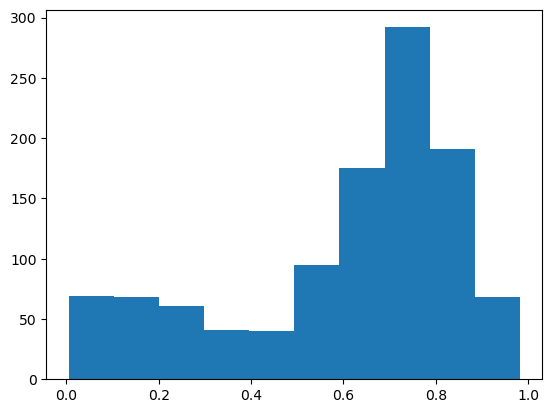

In [11]:
plt.hist(cdf)

In [12]:
len(cdf[cdf<0.1])

TypeError: '<' not supported between instances of 'list' and 'float'

In [14]:
counts = 0
for i in range(1100):
    if cdf[i] < 0.1:
        counts += 1
counts

66